# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

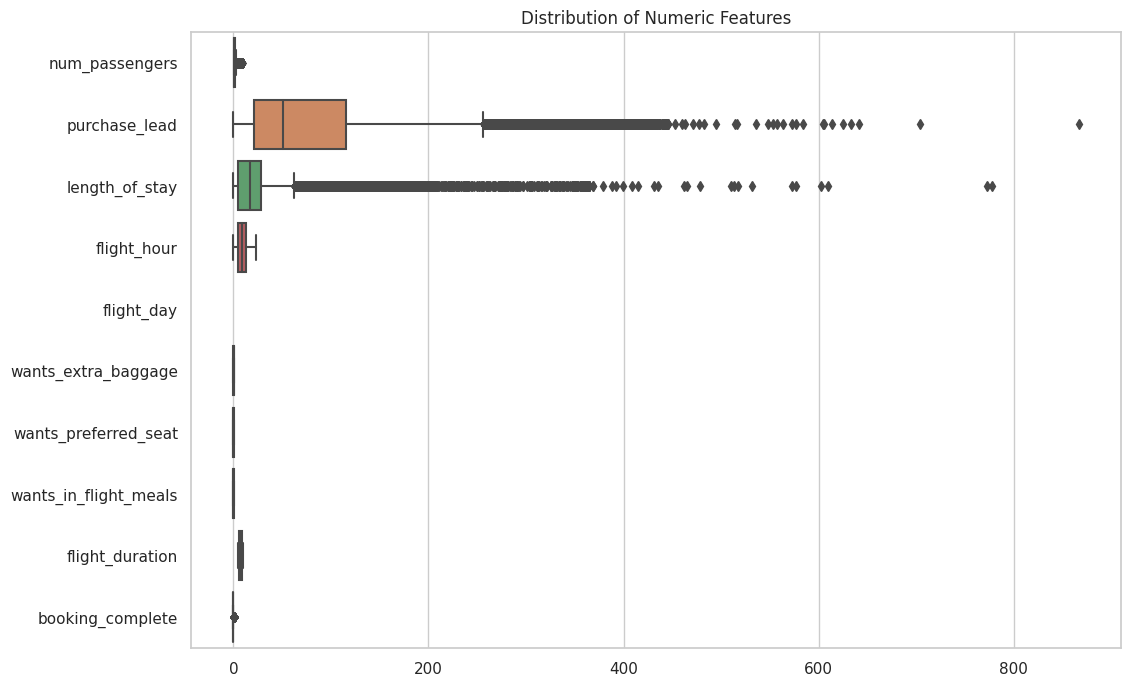

In [8]:
# Convert "flight_day" to numerical values
day_mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
df["flight_day"] = df["flight_day"].map(day_mapping)

# Summary statistics for numeric columns
numeric_summary = df.describe()

# Visualize the distribution of numerical features
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(data=df, orient="h")
plt.title("Distribution of Numeric Features")
plt.show()


In [9]:
df.isna().sum()

num_passengers               0
sales_channel                0
trip_type                    0
purchase_lead                0
length_of_stay               0
flight_hour                  0
flight_day               50000
route                        0
booking_origin               0
wants_extra_baggage          0
wants_preferred_seat         0
wants_in_flight_meals        0
flight_duration              0
booking_complete             0
dtype: int64

In [10]:
df.drop(columns=["flight_day"], inplace=True)



In [11]:
# Perform one-hot encoding for categorical columns
X_encoded = pd.get_dummies(df, columns=["sales_channel", "trip_type", "route", "booking_origin"], drop_first=True)


In [12]:
# Define features (X) and target variable (y)
X = X_encoded.drop(columns=["booking_complete"])  # Features
y = X_encoded["booking_complete"]  # Target variable


In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Train the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.8522

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      8520
           1       0.50      0.16      0.24      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.57      0.58     10000
weighted avg       0.82      0.85      0.82     10000



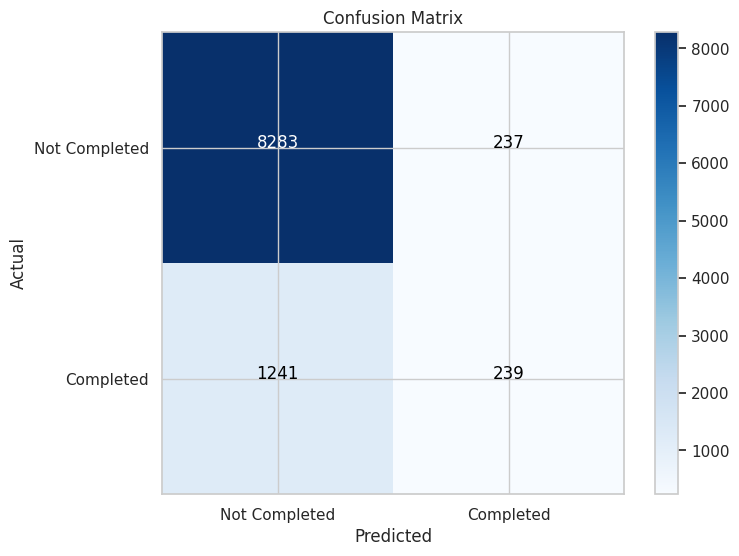

In [16]:
# Visualize the confusion matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ["Not Completed", "Completed"])
plt.yticks([0, 1], ["Not Completed", "Completed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()


In [17]:
# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns


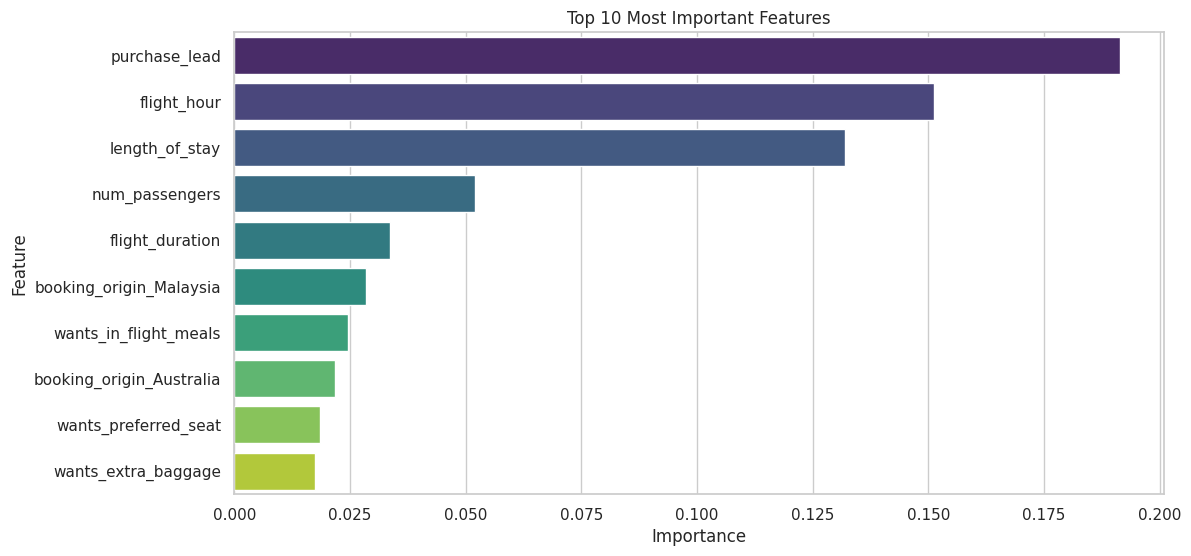

In [18]:
# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the top N most important features
import seaborn as sns

top_n = 10
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n), palette="viridis")
plt.title('Top {} Most Important Features'.format(top_n))
plt.show()


In [21]:
# Visualize the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x792bb80d5b40> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x792bb80d4dc0> (for post_execute):


KeyboardInterrupt: ignored

In [24]:
!pip install python-pptx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.5/471.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.5/153.5 kB 16.0 MB/s eta 0:00:00


In [27]:
# Perform cross-validation
cv_scores = cross_val_score(rf_classifier_encoded, X_encoded, y, cv=5, scoring='accuracy')

# Calculate mean and standard deviation of cross-validation scores
cv_mean_score = cv_scores.mean()
cv_std_score = cv_scores.std()

# Print cross-validation results
print("Cross-Validation Mean Accuracy:", cv_mean_score)
print("Cross-Validation Standard Deviation:", cv_std_score)


Cross-Validation Mean Accuracy: 1.0
Cross-Validation Standard Deviation: 0.0


In [30]:
from pptx import Presentation
from pptx.util import Inches

# Create a new PowerPoint presentation
prs = Presentation()

# Slide Title: Model Evaluation and Feature Importance
slide_title = prs.slides.add_slide(prs.slide_layouts[0])
title = slide_title.shapes.title
title.text = "Model Evaluation and Feature Importance"

# Slide Content: Cross-Validation Results
slide_content = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_content.shapes.title
title.text = "Cross-Validation Results"

content = slide_content.shapes.add_textbox(Inches(1), Inches(1.5), Inches(8), Inches(3))
text_frame = content.text_frame

p = text_frame.add_paragraph()
p.text = "Cross-Validation Mean Accuracy: {:.4f}".format(cv_mean_score)

p = text_frame.add_paragraph()
p.text = "Cross-Validation Standard Deviation: {:.4f}".format(cv_std_score)

# Slide Content: Feature Importance
slide_content = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_content.shapes.title
title.text = "Feature Importance"

content = slide_content.shapes.add_textbox(Inches(1), Inches(1.5), Inches(8), Inches(3))
text_frame = content.text_frame

p = text_frame.add_paragraph()
p.text = "Top 10 Most Important Features:"
for idx, row in feature_importance_df.head(10).iterrows():
    p = text_frame.add_paragraph()
    p.text = "{}: {:.4f}".format(row['Feature'], row['Importance'])

# Save the PowerPoint presentation
prs.save("/content/model_evaluation_summary.pptx")


In [31]:
from google.colab import files

# Replace 'my_presentation.pptx' with the actual filename you used
files.download("/content/model_evaluation_summary.pptx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>